BNP_PARIBAS

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:

#Load train and test 

train_file = pd.read_csv('input/train.csv')
#test_file  = pd.read_csv('../input/test.csv')

In [ ]:
num_train = len(train_file)


In [4]:
train_file.head(4)

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483


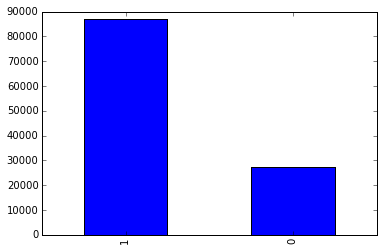

In [6]:
#target varibale 
train_file.target.value_counts().plot.bar()

In [40]:
uniquecount = [train_file[col].nunique() for col in train_file.columns.values]

In [41]:
uniquecount = pd.DataFrame(data=list(zip(train_file.columns.values,uniquecount)),columns = ["var","unique_count"])



#uniquecount=pd.DataFrame(data=list(zip(train.columns.values,uniquecount)),columns=["var","unique_count"])

In [42]:
uniquecount

,var,unique_count
0,ID,114321
1,target,2
2,v1,64487
3,v2,64524
4,v3,3
5,v4,64524
6,v5,65671
7,v6,64487
8,v7,64489
9,v8,65688
